In [2]:
####导入包

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

生成数据

In [13]:
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums,2)
x0 = torch.normal(mean_value*n_data,1)+bias
y0 = torch.zeros(sample_nums)
x1 = torch.normal(-mean_value*n_data)+bias
y1 = torch.ones(sample_nums)
train_x = torch.cat((x0,x1),0)
train_y = torch.cat((y0,y1),0)
print(train_x.size(),train_y.size())

torch.Size([200, 2]) torch.Size([200])


选择模型

In [14]:
class Lr(nn.Module):
    def __init__(self):
        super(Lr,self).__init__()
        self.features =nn.Linear(2,1)
        self.sigmod = nn.Sigmoid()
    def forward(self,x):
        x = self.sigmod(self.features(x))
        return x

In [15]:
model = Lr()

损失函数

In [16]:
loos_fn = nn.BCELoss()#二分类的交叉熵

选择优化器

In [17]:
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr,momentum=0.9)

训练

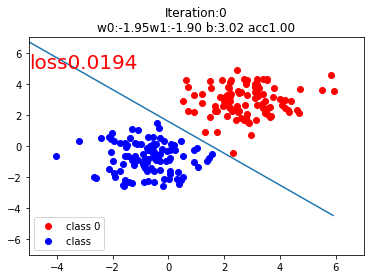

In [21]:
for i in range(1000):
    y_hat = model(train_x)
    loss = loos_fn(y_hat.squeeze(),train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i %20==0:
        mask = y_hat.ge(0.5).float().squeeze()
        correct = (mask == train_y).sum()
        acc = correct.item()/train_y.size(0)
        
        plt.scatter(x0.data.numpy()[:,0],x0.data.numpy()[:,1],c ='r',label='class 0')
        plt.scatter(x1.data.numpy()[:,0],x1.data.numpy()[:,1],c ='b',label='class ')
        
        w0,w1 = model.features.weight[0]
        w0,w1 = float(w0.item()),float(w1.item())
        b = float(model.features.bias[0].item())
        
        plot_x = np.arange(-6,6,0.1)
        plot_y = (-w0*plot_x-b)/w1
        
        plt.xlim(-5,7)
        plt.ylim(-7,7)
        plt.plot(plot_x,plot_y)
        
        plt.text(-5,5,'loss%.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.title('Iteration:{}\nw0:{:.2f}w1:{:.2f} b:{:.2f} acc{:.2f}'.format(i,w0,w1,b,acc))
        plt.legend()
        plt.show()
        plt.pause(0.5)
        if loss.item() <0.02:
            break